In [1]:
import torch
# 사용안하면 run all cells하다가 마지막에 리스타트 오류남.
# CPU 에서 GPU 활성 하기
if torch.cuda.is_available():
    device = torch.device("cuda") # 목적지가 cuda device에 설정된다.
    print("CUDA(GPU)를 사용합니다.")
else:
    device = torch.device("cpu")
    print("CUDA(GPU)를 사용할 수 없으므로, cpu를 사용합니다.")

CUDA(GPU)를 사용합니다.


In [2]:
print('ks')

ks


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               37376     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,257
Trainable params: 48,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\user\AppData\Local\Temp\ipykernel_18824\193613558.py:9: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./encoded_data.csv')


42/42 [==============================] - 1s 5ms/step - loss: 12.6953 - mean_absolute_error: 2.2867 - val_loss: 1.3870 - val_mean_absolute_error: 0.9181
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.8112 - mean_absolute_error: 0.6918 - val_loss: 0.4911 - val_mean_absolute_error: 0.5017
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4599 - mean_absolute_error: 0.4855 - val_loss: 0.3363 - val_mean_absolute_error: 0.3898
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.3127 - mean_absolute_error: 0.3654 - val_loss: 0.2501 - val_mean_absolute_error: 0.3079
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.2340 - mean_absolute_error: 0.3010 - val_loss: 0.2647 - val_mean_absolute_error: 0.3630
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.1983 - mean_absolute_error: 0.3030 - val_loss: 0.1492 - val_mean_absolute_error: 0.2499
Epoch 7/100
42/42 [==============

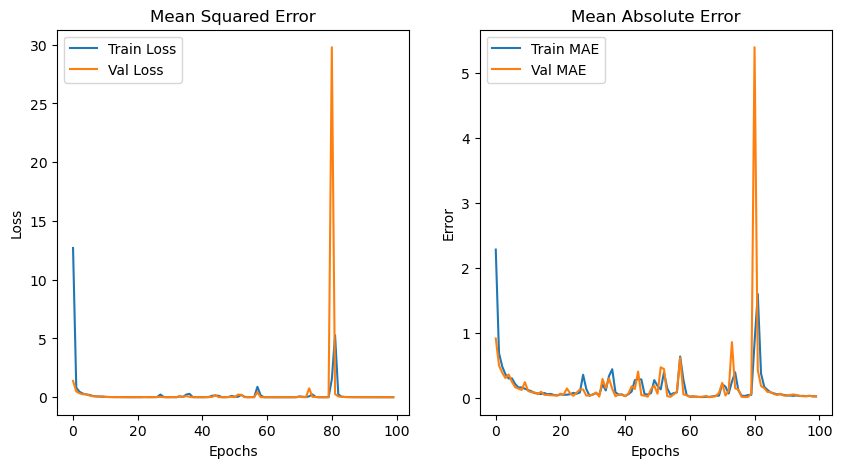

In [4]:
# 내일 3번처럼 나눠보기 20240724
# 패키지 사용
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 로드
df = pd.read_csv('./encoded_data.csv')

# change_date 열을 제외한 나머지 열 선택
X = df.drop(columns=['change_date'])
y = df['change_date'].values # 예측값

# 결측값 처리 (예: 평균값으로 대체)
X.replace('-', np.nan, inplace=True)
X = X.astype(np.float32)
X.fillna(X.mean(), inplace=True)

y = y.astype(np.float32)

# train/test 데이터셋 나누기 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train/val 데이터셋 나누기 (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Sequential 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X.shape[1], activation='relu'), # 입력계층 특성 수를 자동으로 설정
    tf.keras.layers.Dense(64, activation='relu'), # 은닉계층1
    tf.keras.layers.Dense(32, activation='relu'), # 은닉계층2
    tf.keras.layers.Dense(16, activation='relu'), # 은닉계층3
    tf.keras.layers.Dense(1, activation='linear') # 출력계층   activation linear 사용 #@!
])

# 회귀를 위한 손실 함수(mean squared error)와 메트릭스(mean absolute error) 사용하여 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# 모델 정보(요약) 확인
model.summary()

# 시드 값 설정
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)

# 모델 학습
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=100)

# 학습 결과 시각화
plt.figure(figsize=(10, 5))

# subplot 1: Mean Squared Error 손실 함수의 변화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# subplot 2: Mean Absolute Error 매트릭스의 변화
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.show()


In [5]:
# 손실 함수와 평균 절대 오차 값을 가져오기
loss_values = history.history['loss']
mean_absolute_error_values = history.history['mean_absolute_error']
mean_absolute_error_values = history.history['mean_absolute_error'] # 결정계수 r^2 

# 에포크 수
epochs = len(loss_values)

# 결과 출력
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}: Loss (MSE) = {loss_values[epoch]:.4f}, MAE = {mean_absolute_error_values[epoch]:.4f}")

Epoch 1: Loss (MSE) = 12.6953, MAE = 2.2867
Epoch 2: Loss (MSE) = 0.8112, MAE = 0.6918
Epoch 3: Loss (MSE) = 0.4599, MAE = 0.4855
Epoch 4: Loss (MSE) = 0.3127, MAE = 0.3654
Epoch 5: Loss (MSE) = 0.2340, MAE = 0.3010
Epoch 6: Loss (MSE) = 0.1983, MAE = 0.3030
Epoch 7: Loss (MSE) = 0.1154, MAE = 0.2164
Epoch 8: Loss (MSE) = 0.0766, MAE = 0.1637
Epoch 9: Loss (MSE) = 0.0615, MAE = 0.1639
Epoch 10: Loss (MSE) = 0.0456, MAE = 0.1441
Epoch 11: Loss (MSE) = 0.0320, MAE = 0.1232
Epoch 12: Loss (MSE) = 0.0216, MAE = 0.1058
Epoch 13: Loss (MSE) = 0.0122, MAE = 0.0761
Epoch 14: Loss (MSE) = 0.0098, MAE = 0.0719
Epoch 15: Loss (MSE) = 0.0070, MAE = 0.0612
Epoch 16: Loss (MSE) = 0.0096, MAE = 0.0779
Epoch 17: Loss (MSE) = 0.0058, MAE = 0.0585
Epoch 18: Loss (MSE) = 0.0068, MAE = 0.0643
Epoch 19: Loss (MSE) = 0.0039, MAE = 0.0472
Epoch 20: Loss (MSE) = 0.0031, MAE = 0.0418
Epoch 21: Loss (MSE) = 0.0051, MAE = 0.0569
Epoch 22: Loss (MSE) = 0.0040, MAE = 0.0499
Epoch 23: Loss (MSE) = 0.0046, MAE = 0.0

In [7]:
from sklearn.metrics import r2_score

# 예측값 생성
predictions = model.predict(X_val)

33/33 [==============================] - 0s 1ms/step


In [8]:
# 결정계수 계산
r2 = r2_score(y_val, predictions)

In [9]:
print(f"결정계수 (R²): {r2:.4f}")

결정계수 (R²): 0.9999


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 예측값 생성
predictions = model.predict(X_val)

# 결정계수 (R²) 계산
r2 = r2_score(y_val, predictions)
print(f"결정계수 (R²): {r2:.4f}")

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_val, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Absolute Percentage Error (MAPE) 계산
mape = np.mean(np.abs((y_val - predictions) / y_val)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

# Root Mean Squared Error (RMSE) 계산
rmse = np.sqrt(mean_squared_error(y_val, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Mean Bias Deviation (MBD) 계산
mbd = np.mean(predictions - y_val)
print(f"Mean Bias Deviation (MBD): {mbd:.4f}")

# Adjusted R² 계산
n = len(y_val)  # 샘플 수
p = X_val.shape[1]  # 독립 변수 수
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R²: {adjusted_r2:.4f}")

33/33 [==============================] - 0s 1ms/step
결정계수 (R²): 0.9999
Mean Absolute Error (MAE): 0.0267
Mean Absolute Percentage Error (MAPE): 21.5772%
Root Mean Squared Error (RMSE): 0.0343
Mean Bias Deviation (MBD): 0.0165
Adjusted R²: 0.9999


In [ ]:
# 결정계수 (R²): 0.9999

# 매우 높은 결정계수로, 모델이 데이터의 변동성을 거의 완벽하게 설명하고 있음을 나타냅니다.
# Mean Absolute Error (MAE): 0.0267

# 평균적으로 모델의 예측값과 실제값 간의 절대 오차가 약 0.0267이라는 뜻으로, 예측이 상대적으로 정확하다는 것을 보여줍니다.
# Mean Absolute Percentage Error (MAPE): 21.5772%

# 평균적으로 약 21.58%의 오차가 있다는 의미입니다. 상대적으로 높은 값으로, 데이터의 스케일에 따라 다르게 해석될 수 있습니다. 특정 상황에서는 수용 가능한 범위일 수 있지만, 낮은 값이 더 바람직합니다.
# Root Mean Squared Error (RMSE): 0.0343

# RMSE가 0.0343이라는 것은 예측의 오차가 작다는 것을 나타냅니다. RMSE는 큰 오차에 더 민감하기 때문에, 큰 오차가 문제가 되는 경우 유용한 지표입니다.
# Mean Bias Deviation (MBD): 0.0165

# MBD가 양수라는 것은 모델이 실제값보다 약간 과대 평가하는 경향이 있음을 나타냅니다. 값이 작기 때문에 큰 문제는 아닙니다.
# Adjusted R²: 0.9999

# 결정계수의 수정된 버전으로, 모델의 복잡성을 고려했을 때도 여전히 매우 높은 성능을 보여줍니다.
# 이 값들이 나오는 것이 맞는지 여부는 모델의 특성, 데이터의 분포, 훈련 및 테스트 데이터의 품질 등에 따라 다를 수 있습니다. 일반적으로 이러한 성능 지표의 조합을 고려할 때, R²와 MAE, RMSE가 매우 우수한 성능을 나타내고 있다면, 모델이 잘 작동하고 있다고 평가할 수 있습니다.

# 그러나 MAPE 값은 상대적으로 높은 편이므로, 데이터의 특성이나 스케일을 고려하여 추가적인 분석이 필요할 수 있습니다. 전체적으로는 좋은 성능을 나타내는 지표들이며, 특정 지표에 대한 추가적인 조정이나 개선이 필요할 수 있습니다.